In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading file
file_path = '/Users/meliscan/machineProject/electricity_data.csv'

data = pd.read_csv(file_path)

In [5]:
# Combining the Date and Time columns and converting them to datetime type
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

In [6]:
# Filtering rows where the minute is 0
hourly_data = data[data['datetime'].dt.minute == 0]

In [7]:
# Removing the original Date and Time columns
del hourly_data['Date']
del hourly_data['Time']

In [8]:
# Saving or inspecting the filtered dataset
hourly_data.reset_index(inplace=True, drop=True)  # To reset the index
print(hourly_data.head())

   Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
0                  0.180   237.52              11.8             0.0   
1                  0.088   231.99              17.4             0.0   
2                  0.078   232.43              13.8             0.0   
3                  0.072   236.76              14.0             0.0   
4                  0.170   236.03              14.6             0.0   

   Sub_metering_2  Sub_metering_3  Global_active_power            datetime  
0             0.0            18.0                2.790 2006-12-16 18:00:00  
1             1.0            17.0                4.070 2006-12-16 19:00:00  
2             0.0            16.0                3.206 2006-12-16 20:00:00  
3             0.0            17.0                3.314 2006-12-16 21:00:00  
4             1.0            17.0                3.464 2006-12-16 22:00:00  


In [10]:
file_path2 = '/Users/meliscan/machineProject/hourly_electricity_data.csv' 
hourly_data = pd.read_csv(file_path2)

hourly_data['datetime'] = pd.to_datetime(hourly_data['datetime'])

In [12]:
# Extract year, month, day, hour by adding new columns
hourly_data['year'] = hourly_data['datetime'].dt.year
hourly_data['month'] = hourly_data['datetime'].dt.month
hourly_data['day'] = hourly_data['datetime'].dt.day
hourly_data['hour'] = hourly_data['datetime'].dt.hour
hourly_data['weekday'] = hourly_data['datetime'].dt.weekday  # day of the week (0: monday, 6: sunday)

hourly_data = hourly_data.drop(columns=['datetime'])

In [13]:
# Remove missing data
hourly_data = hourly_data.dropna()

print(hourly_data.head())

   Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
0                  0.180   237.52              11.8             0.0   
1                  0.088   231.99              17.4             0.0   
2                  0.078   232.43              13.8             0.0   
3                  0.072   236.76              14.0             0.0   
4                  0.170   236.03              14.6             0.0   

   Sub_metering_2  Sub_metering_3  Global_active_power  year  month  day  \
0             0.0            18.0                2.790  2006     12   16   
1             1.0            17.0                4.070  2006     12   16   
2             0.0            16.0                3.206  2006     12   16   
3             0.0            17.0                3.314  2006     12   16   
4             1.0            17.0                3.464  2006     12   16   

   hour  weekday  
0    18        5  
1    19        5  
2    20        5  
3    21        5  
4    22        5  


In [14]:
# Statistical summary
print(hourly_data.describe())

       Global_reactive_power       Voltage  Global_intensity  Sub_metering_1  \
count            34588.00000  34588.000000      34588.000000    34588.000000   
mean                 0.12354    240.718187          4.654426        1.108077   
std                  0.11277      3.217112          4.440797        6.077328   
min                  0.00000    225.540000          0.200000        0.000000   
25%                  0.04800    238.887500          1.400000        0.000000   
50%                  0.10000    240.840000          2.800000        0.000000   
75%                  0.19400    242.770000          6.400000        0.000000   
max                  1.21800    253.170000         37.600000       80.000000   

       Sub_metering_2  Sub_metering_3  Global_active_power          year  \
count    34588.000000    34588.000000         34588.000000  34588.000000   
mean         1.324799        6.505432             1.097415   2008.436683   
std          5.881935        8.408313             1

In [15]:
# Separate input (X) and target (y) variables
X = hourly_data.drop(columns=['Global_active_power']) 
y = hourly_data['Global_active_power'] 

In [16]:
# Split into training and temporary set (test + validation)
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Split the test and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training Data Size:", X_train.shape)
print("Test Data Size:", X_test.shape)
print("Validation Data Size:", X_val.shape)

Training Data Size: (24211, 11)
Test Data Size: (5188, 11)
Validation Data Size: (5189, 11)


In [18]:
# Building the model
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer specifying the input shape
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # First layer with L2 regularization 
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')  # Output layer for regression
])


2024-12-23 00:21:58.424605: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-12-23 00:21:58.424633: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-23 00:21:58.424639: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-23 00:21:58.425146: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-23 00:21:58.425158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [20]:
# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Training the model
history = model.fit(
    X_train, y_train,
    epochs=25, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    verbose=1  
) 

Epoch 1/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.5372 - mae: 0.4794 - val_loss: 0.1534 - val_mae: 0.1595
Epoch 2/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4699 - mae: 0.4614 - val_loss: 0.1263 - val_mae: 0.0552
Epoch 3/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4932 - mae: 0.3893 - val_loss: 0.1260 - val_mae: 0.0847
Epoch 4/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.4651 - mae: 0.4506 - val_loss: 0.1229 - val_mae: 0.0864
Epoch 5/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3774 - mae: 0.4095 - val_loss: 0.1139 - val_mae: 0.0418
Epoch 6/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4165 - mae: 0.4378 - val_loss: 0.2572 - val_mae: 0.3866
Epoch 7/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3858 - mae: 0.3930 - val_loss: 1.2688 - val_mae: 1.0789
Epoch 8/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3667 - mae: 0.3941 - val_loss: 0.1056 - val_mae: 0.0694
Epoch 9/25
757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - lo

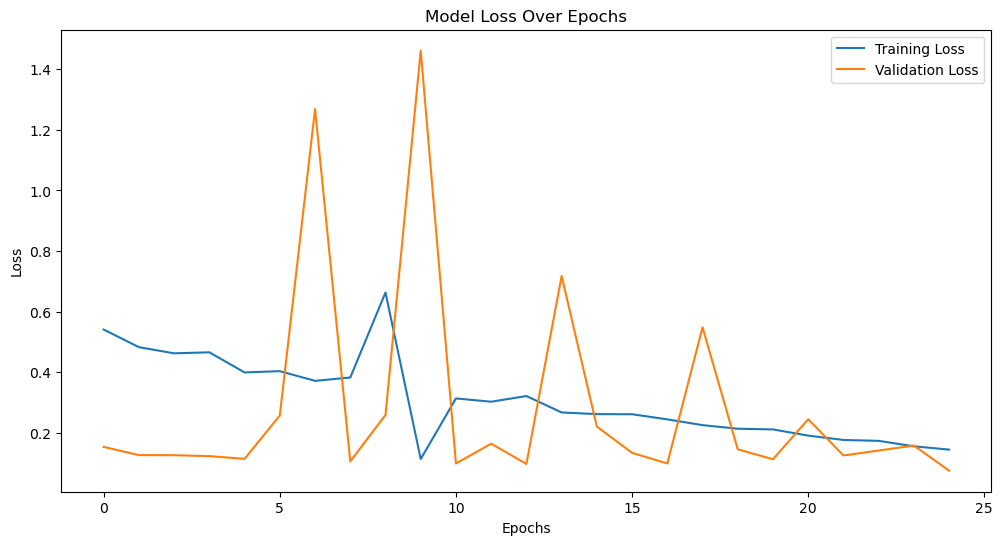

In [25]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()

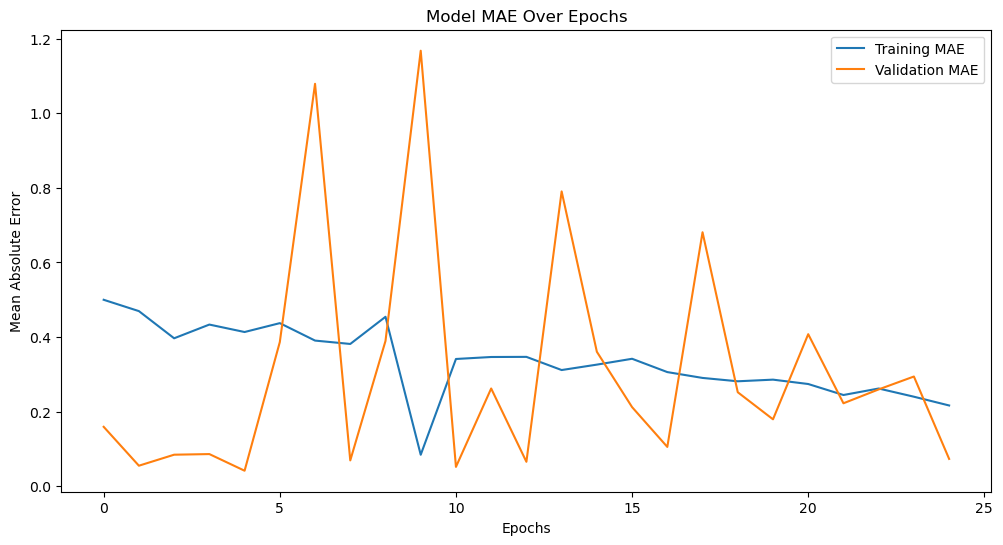

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Model MAE Over Epochs')
plt.legend()
plt.show()

In [27]:
# Model predictions
y_pred = model.predict(X_val)

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step


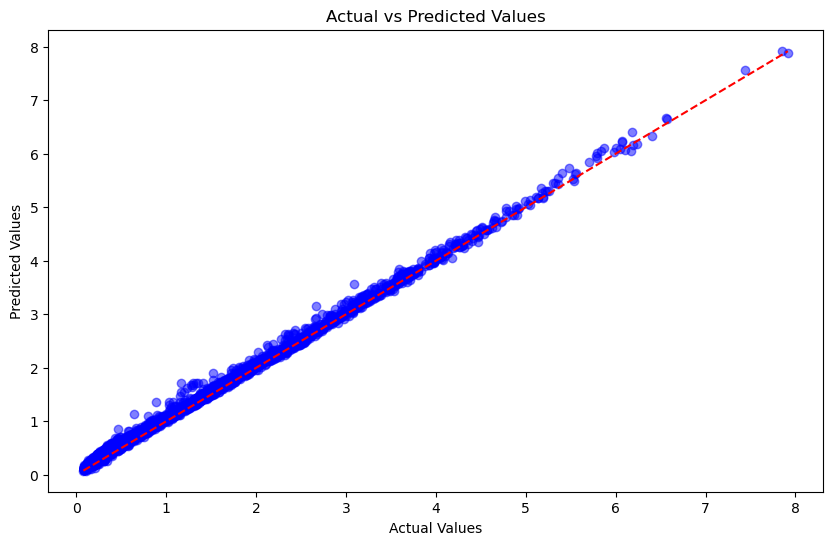

In [28]:
# Real vs Prediction Graph
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

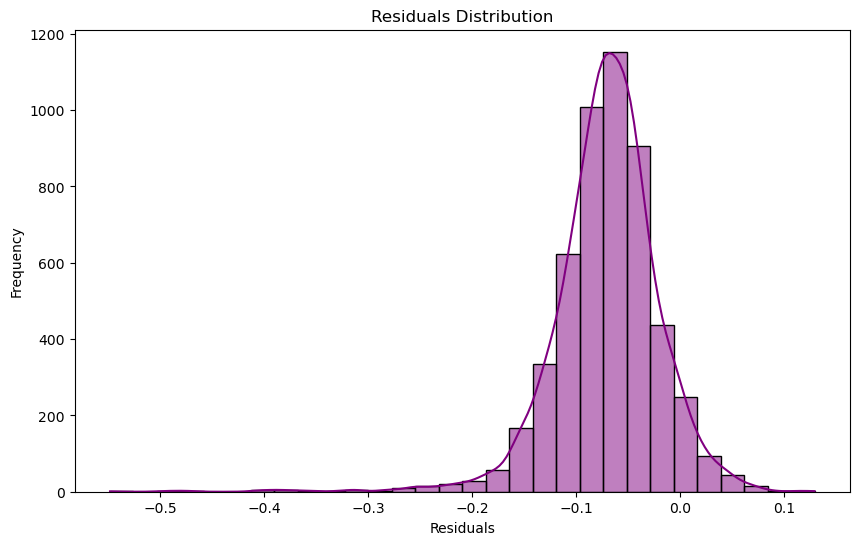

In [29]:
# Residuals Analysis
residuals = y_val - y_pred.flatten()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [30]:
# Define daytime (09:00 - 18:00) and nighttime (18:00 - 09:00) hours
hourly_data['period'] = hourly_data['hour'].apply(lambda x: 'Day' if 9 <= x <= 18 else 'Night')

In [31]:
# Calculate hourly average consumption for daytime and nighttime
day_consumption = hourly_data[hourly_data['period'] == 'Day'].groupby('hour')['Global_active_power'].mean()
night_consumption = hourly_data[hourly_data['period'] == 'Night'].groupby('hour')['Global_active_power'].mean()

In [32]:
# Calculate the 75th percentile thresholds for daytime and nighttime
day_threshold = day_consumption.quantile(0.75)
night_threshold = night_consumption.quantile(0.75)

In [33]:
# Identify the hours where consumption exceeds the threshold for daytime and nighttime
day_high_usage = day_consumption[day_consumption > day_threshold]
night_high_usage = night_consumption[night_consumption > night_threshold]

In [34]:
# Warning messages
print("=== Daytime (09:00 - 18:00) ===")
if not day_high_usage.empty:
    print("Warning! High consumption hours during daytime:")
    for hour, consumption in day_high_usage.items():
        print(f"  - Hour {hour}: {consumption:.2f} kW (exceeds threshold!)")
else:
    print("Congratulations! No hours exceed the threshold during daytime.")

print("\n=== Nighttime (18:00 - 09:00) ===")
if not night_high_usage.empty:
    print("Warning! High consumption hours during nighttime:")
    for hour, consumption in night_high_usage.items():
        print(f"  - Hour {hour}: {consumption:.2f} kW (exceeds threshold!)")
else:
    print("Congratulations! No hours exceed the threshold during nighttime.")

=== Daytime (09:00 - 18:00) ===
Warning! High consumption hours during daytime:
  - Hour 9: 1.36 kW (exceeds threshold!)
  - Hour 10: 1.28 kW (exceeds threshold!)
  - Hour 11: 1.24 kW (exceeds threshold!)

=== Nighttime (18:00 - 09:00) ===
Warning! High consumption hours during nighttime:
  - Hour 19: 1.58 kW (exceeds threshold!)
  - Hour 20: 1.77 kW (exceeds threshold!)
  - Hour 21: 1.95 kW (exceeds threshold!)
  - Hour 22: 1.74 kW (exceeds threshold!)


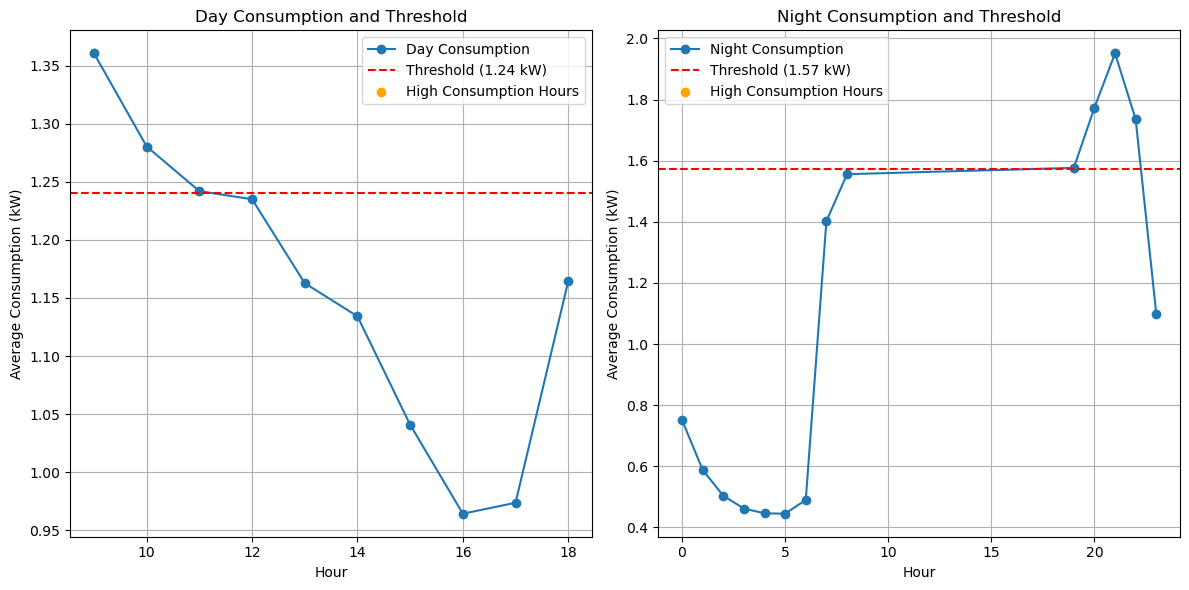

In [37]:
# Plotting the daytime and nighttime graphs
plt.figure(figsize=(12, 6))

# Daytime plot
plt.subplot(1, 2, 1)
plt.plot(day_consumption.index, day_consumption.values, marker='o', label='Day Consumption')
plt.axhline(y=day_threshold, color='red', linestyle='--', label=f'Threshold ({day_threshold:.2f} kW)')
plt.scatter(day_high_usage.index, day_high_usage.values, color='orange', label='High Consumption Hours')
plt.title('Day Consumption and Threshold')
plt.xlabel('Hour')
plt.ylabel('Average Consumption (kW)')
plt.legend()
plt.grid()

# Nighttime plot
plt.subplot(1, 2, 2)
plt.plot(night_consumption.index, night_consumption.values, marker='o', label='Night Consumption')
plt.axhline(y=night_threshold, color='red', linestyle='--', label=f'Threshold ({night_threshold:.2f} kW)')
plt.scatter(night_high_usage.index, night_high_usage.values, color='orange', label='High Consumption Hours')
plt.title('Night Consumption and Threshold')
plt.xlabel('Hour')
plt.ylabel('Average Consumption (kW)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [38]:
# Calculate the average consumption for each month
monthly_consumption = hourly_data.groupby('month')['Global_active_power'].mean()

In [39]:
# Threshold for monthly consumption (75th percentile)
monthly_threshold = monthly_consumption.quantile(0.75)

In [40]:
# Identify the months where consumption exceeds the threshold
high_usage_months = monthly_consumption[monthly_consumption > monthly_threshold]

In [41]:
# Warning messages
print("=== Monthly Analysis ===")
if not high_usage_months.empty:
    print("Warning! Months exceeding the threshold:")
    for month, consumption in high_usage_months.items():
        print(f"  - Month {month}: {consumption:.2f} kW (exceeds threshold!)")
else:
    print("Congratulations! No months exceed the threshold.")

=== Monthly Analysis ===
Warning! Months exceeding the threshold:
  - Month 1: 1.46 kW (exceeds threshold!)
  - Month 11: 1.30 kW (exceeds threshold!)
  - Month 12: 1.51 kW (exceeds threshold!)


In [46]:
# Summer and Winter months analysis
summer_months = hourly_data[hourly_data['month'].isin([6, 7, 8])]
winter_months = hourly_data[hourly_data['month'].isin([12, 1, 2])]

summer_consumption = summer_months['Global_active_power'].mean()
winter_consumption = winter_months['Global_active_power'].mean()

print("Average Consumption in Summer Months:", summer_consumption)
print("Average Consumption in Winter Months:", winter_consumption)

Average Consumption in Summer Months: 0.732735656372411
Average Consumption in Winter Months: 1.421891677775047


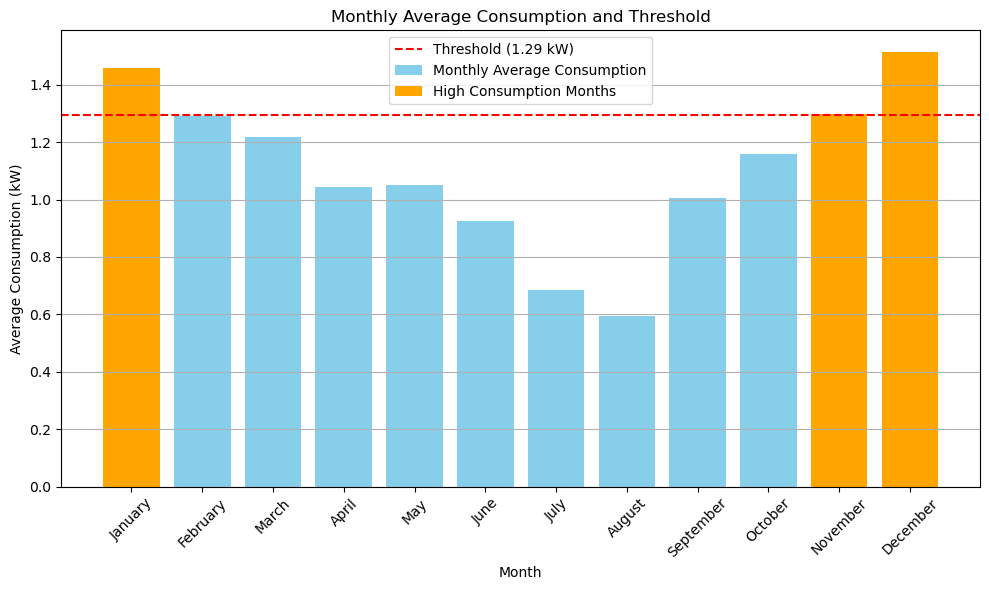

In [47]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_consumption.index, monthly_consumption.values, color='skyblue', label='Monthly Average Consumption')
plt.axhline(y=monthly_threshold, color='red', linestyle='--', label=f'Threshold ({monthly_threshold:.2f} kW)')
plt.bar(high_usage_months.index, high_usage_months.values, color='orange', label='High Consumption Months')
plt.xticks(monthly_consumption.index, ['January', 'February', 'March', 'April', 'May', 'June', 
                                       'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.title('Monthly Average Consumption and Threshold')
plt.xlabel('Month')
plt.ylabel('Average Consumption (kW)')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

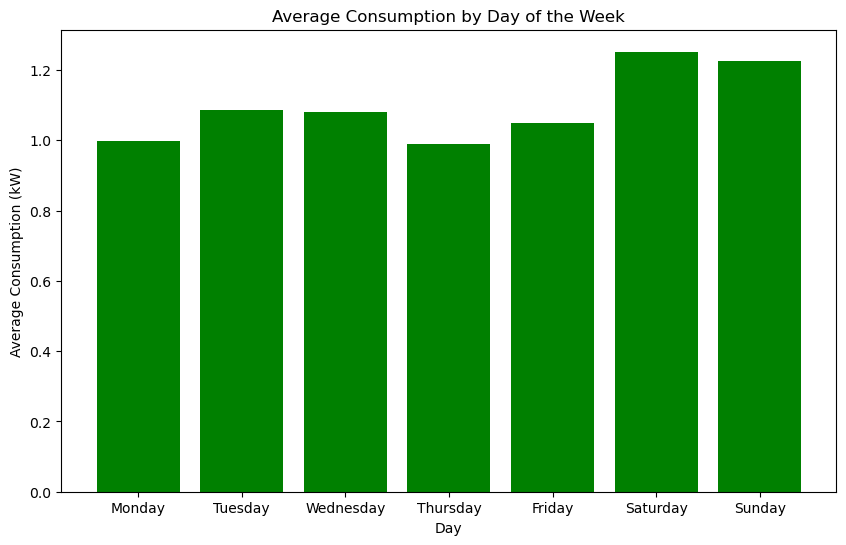

In [48]:
# Daily total consumption
weekday_consumption = hourly_data.groupby('weekday')['Global_active_power'].mean()

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
plt.bar(days, weekday_consumption.values, color='green')
plt.title('Average Consumption by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Average Consumption (kW)')
plt.show()